In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
image_as_array = mpimg.imread('palm_trees.jpg')

In [3]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [4]:
image_as_array.shape # (H,W,C)

(1401, 934, 3)

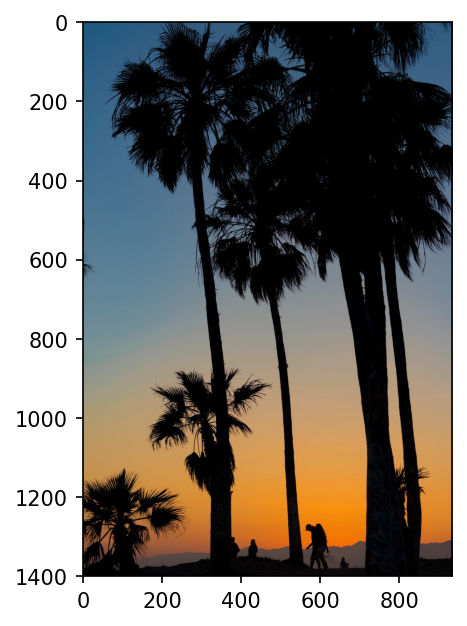

In [6]:
plt.figure(dpi=150)
plt.imshow(image_as_array)

<h4>(H,W,C) ----->>>> 2D (H*W,C)
<br>convert 3D array into 2D array</h4>

In [7]:
(h,w,c) = image_as_array.shape

In [12]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [13]:
image_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [14]:
len(image_as_array.shape)

3

In [15]:
len(image_as_array2d.shape)

2

In [16]:
from sklearn.cluster import KMeans

In [17]:
model = KMeans(n_clusters=6)

In [25]:
labels = model.fit_predict(image_as_array2d)

C:\Users\jagam\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
labels

array([3, 3, 3, ..., 0, 0, 0])

In [27]:
model.cluster_centers_

array([[  2.76743149,   2.58759727,   3.71399576],
       [192.80593035, 154.49802556, 108.06682488],
       [137.81459286, 144.08126412, 143.63996224],
       [ 71.3468582 , 109.45909259, 137.79348599],
       [ 67.54615445,  61.71712169,  62.11769188],
       [219.35870439, 134.84877116,  45.76526927]])

In [28]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [29]:
rgb_codes

array([[  3,   3,   4],
       [193, 154, 108],
       [138, 144, 144],
       [ 71, 109, 138],
       [ 68,  62,  62],
       [219, 135,  46]])

In [30]:
rgb_codes[labels]

array([[ 71, 109, 138],
       [ 71, 109, 138],
       [ 71, 109, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [32]:
quantized_image = np.reshape(rgb_codes[labels],(h,w,c))

In [33]:
quantized_image

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 68,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 68,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

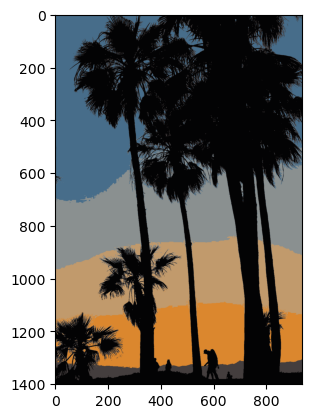

In [34]:
plt.imshow(quantized_image)